<a href="https://colab.research.google.com/github/BenjaAR/LAB09_MD_AQUINO_REYES/blob/main/LAB09_AQUINO_REYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO CALIFICADO**

SEMANA 4: INTEGRACIÓN Y LIMPIEZA. TABLA DE VARIABLES Y CREACIÓN DE NUEVAS VARIABLES. TRANSFORMACIÓN DE DATOS

Alumno: Aquino Reyes Benjy Alvaro


In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importar bibliotecas necesarias
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

1. Importación de los datos

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# variable information
breast_cancer_wisconsin_original.variables


,name,role,type,demographic,description,units,missing_values
0,Sample_code_number,ID,Categorical,None,None,None,no
1,Clump_thickness,Feature,Integer,None,None,None,no
2,Uniformity_of_cell_size,Feature,Integer,None,None,None,no
3,Uniformity_of_cell_shape,Feature,Integer,None,None,None,no
4,Marginal_adhesion,Feature,Integer,None,None,None,no
5,Single_epithelial_cell_size,Feature,Integer,None,None,None,no
6,Bare_nuclei,Feature,Integer,None,None,None,yes
7,Bland_chromatin,Feature,Integer,None,None,None,no
8,Normal_nucleoli,Feature,Integer,None,None,None,no
9,Mitoses,Feature,Integer,None,None,None,no


In [ ]:
# 3. Unir en un solo DataFrame
df_01 = pd.concat([X, y], axis=1)

df_01

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


2. Imputación de datos

In [ ]:
#valores nulos hay en 'Bare_nuclei':
print("Valores nulos antes de imputar:", df_01['Bare_nuclei'].isna().sum())

Valores nulos antes de imputar: 16


In [ ]:
#Imputar los valores nulos con la mediana :
mediana = df_01['Bare_nuclei'].median()
df_01['Bare_nuclei'] = df_01['Bare_nuclei'].fillna(mediana)

In [ ]:
print("Valores nulos después de imputar:", df_01['Bare_nuclei'].isna().sum())


Valores nulos después de imputar: 0


3. Cambio de categorias

In [ ]:
print("Valores únicos antes del cambio:", df_01['Class'].unique())

Valores únicos antes del cambio: [2 4]


In [ ]:
#Reemplazar los valores:
df_01['Class'] = df_01['Class'].replace({2: 0, 4: 1})

In [ ]:
print("Valores únicos después del cambio:", df_01['Class'].unique())

Valores únicos después del cambio: [0 1]


In [24]:
# Reducir las combinaciones de los hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(23,), (17,)],  # Menos combinaciones de capas y neuronas
    'activation': ['relu'],  # Solo usar 'relu'
    'solver': ['adam'],  # Usar solo 'adam'
    'learning_rate': ['constant'],  # Usar solo 'constant'
    'alpha': [0.0001],  # Regularización pequeña
}

# Utilizar GridSearchCV para probar las combinaciones de parámetros
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# Evaluar el modelo con los mejores parámetros
best_mlp = grid_search.best_estimator_

# Predecir con el conjunto de prueba
y_pred = best_mlp.predict(X_test)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Mostrar la matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



Mejores parámetros encontrados: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (17,), 'learning_rate': 'constant', 'solver': 'adam'}

Accuracy: 0.9643

Matriz de confusión:
[[92  3]
 [ 2 43]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.93      0.96      0.95        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


* El modelo ha alcanzado un accuracy de 96.43%, lo que es un excelente rendimiento.

* La precisión y el recall para la clase 0 (benigno) son excelentes (0.98 y 0.97, respectivamente), mientras que para la clase 1 (maligno) también son bastante buenos (0.93 y 0.96).

* El F1-score general muestra un buen equilibrio entre precisión y recall en ambas clases (benigno y maligno).

* La matriz de confusión muestra que los errores del modelo son mínimos, con pocos falsos positivos y falsos negativos..

In [23]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Redefinir el clasificador MLP con un número menor de iteraciones
mlp = MLPClassifier(max_iter=200, random_state=42)

# Redefinir el espacio de parámetros a explorar con menos configuraciones
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  # Menos combinaciones de capas y neuronas
    'activation': ['relu', 'tanh'],  # Solo probar con 'relu' y 'tanh'
    'solver': ['adam'],  # Solo usar 'adam' como optimizador
    'learning_rate': ['constant'],  # Solo probar con 'constant' para la tasa de aprendizaje
    'alpha': [0.0001, 0.001],  # Regularización más baja
    'batch_size': ['auto'],  # Usar 'auto' para el tamaño del batch
}

# Realizar la búsqueda en cuadrícula para encontrar los mejores parámetros
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# Evaluar el modelo con los mejores parámetros
best_mlp = grid_search.best_estimator_

# Predecir con el conjunto de prueba
y_pred = best_mlp.predict(X_test)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Mostrar la matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mejores parámetros encontrados: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}

Accuracy: 0.9714

Matriz de confusión:
[[94  1]
 [ 3 42]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Resumen Final
Conclusiones:
Precisión global del modelo: El modelo tiene una excelente precisión del 97.14%, lo que sugiere que puede predecir con alta fiabilidad.

Desempeño en clases:

* El modelo tiene un excelente desempeño en la clase benigno con un recall del 99%, lo que significa que la mayoría de los casos benignos son correctamente identificados.

* Para la clase maligno, el modelo tiene una ligera caída en el recall (93%), lo que indica que hay algunos casos malignos que el modelo no identifica correctamente. A pesar de esto, el rendimiento sigue siendo muy bueno.

* Mejores parámetros: Los parámetros que han dado lugar a este buen rendimiento incluyen una sola capa oculta con 50 neuronas, una función de activación 'relu', el optimizador 'adam', y una regularización moderada (alpha = 0.0001)

b. Tome la base de datos llamada ‘Fashion MNIST’ (https://github.com/zalandoresearch/fashion-mnist) la cual consiste de 60 000 fotos (28×28 pixeles por cada imagen) de prendas de ropa e importándola directamente desde ‘keras’, cree una red neuronal convolucional que sirva para clasificar las imágenes respecto al tipo de ropa mostrado (10 tipos distintos de artículos) de tal forma que se obtenga el mayor valor de accuracy. Para ello, deberá ir ajustando la red neuronal con los parámetros requeridos como la cantidad de capas ocultas y neuronas por cada capa oculta, el número de iteraciones, la función de activación, el método para minimizar la función de error, entre otros.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 63ms/step - accuracy: 0.7264 - loss: 0.7513 - val_accuracy: 0.8601 - val_loss: 0.3857
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.8712 - loss: 0.3571 - val_accuracy: 0.8710 - val_loss: 0.3592
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 54ms/step - accuracy: 0.8876 - loss: 0.3048 - val_accuracy: 0.8857 - val_loss: 0.3193
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 64ms/step - accuracy: 0.9026 - loss: 0.2679 - val_accuracy: 0.8946 - val_loss: 0.2873
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9131 - loss: 0.2395 - val_accuracy: 0.9012 - val_loss: 0.2717
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9172 - loss: 0.2262 - val_accuracy: 0.9066 - val_loss: 0.2582
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9266 - loss: 0.2003 - val_accuracy: 0.8997 - val_loss: 0.2778
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9310 - loss: 0.1854 - 

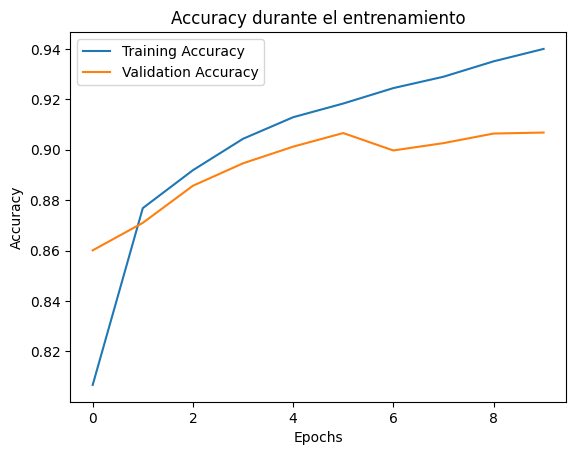

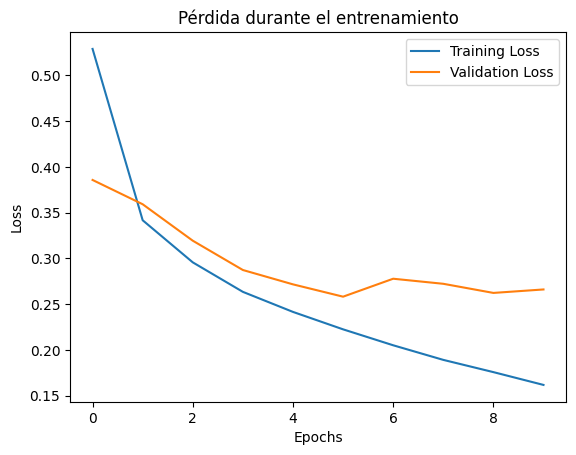

In [25]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Cargar el dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocesar los datos
# Normalizar las imágenes de 28x28 a valores entre 0 y 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Redimensionar las imágenes para que tengan un canal único (grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convertir las etiquetas a formato one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear el modelo de la red neuronal convolucional (CNN)
model = models.Sequential()

# Capa 1: Capa convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Capa 2: Capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Capa 3: Capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Capa de aplanamiento
model.add(layers.Flatten())

# Capa completamente conectada
model.add(layers.Dense(64, activation='relu'))

# Capa de salida con 10 neuronas (una para cada clase)
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo para revisar la arquitectura
model.summary()

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nAccuracy en el conjunto de prueba: {test_acc:.4f}')

# Mostrar gráficas de desempeño (accuracy y loss)
import matplotlib.pyplot as plt

# Accuracy gráfico
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss gráfico
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
